In [10]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import exposure, img_as_float

In [11]:
B5 = skimage.io.imread('F:/image processing in python/Image/Landsat/NIR.tif')

In [12]:
B5

array([[3311, 3527, 3537, ...,  140,  140,  142],
       [2843, 3178, 3337, ...,  138,  137,  142],
       [2769, 2932, 2177, ...,  138,  141,  141],
       ...,
       [3812, 3513, 3390, ..., 1476, 1493, 1649],
       [3571, 3299, 3193, ..., 1870, 2157, 2440],
       [3430, 3347, 3396, ..., 2986, 2712, 2843]], dtype=int16)

In [13]:
img = img_as_float(B5)

In [14]:
img

array([[0.1010605 , 0.1076524 , 0.10795758, ..., 0.00428779, 0.00428779,
        0.00434882],
       [0.08677806, 0.0970016 , 0.10185397, ..., 0.00422675, 0.00419623,
        0.00434882],
       [0.08451972, 0.08949416, 0.06645304, ..., 0.00422675, 0.0043183 ,
        0.0043183 ],
       ...,
       [0.11635004, 0.10722515, 0.10347143, ..., 0.04505989, 0.0455787 ,
        0.05033951],
       [0.10899519, 0.10069429, 0.09745937, ..., 0.057084  , 0.06584268,
        0.07447929],
       [0.10469215, 0.10215915, 0.10365454, ..., 0.09114214, 0.08278019,
        0.08677806]])

In [71]:
gamma_corr = exposure.adjust_gamma(img, gamma=0.7, gain=1)
log_adjust = exposure.adjust_log(img, gain=1, inv=False)
adj_sigmoid = exposure.adjust_sigmoid(img, cutoff=0.1, gain=5, inv=False)
adaptive = exposure.equalize_adapthist(img , clip_limit=0.01, nbins=256)
his_eq = exposure.equalize_hist(img, nbins=256, mask=None)

C:\Users\rsens\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


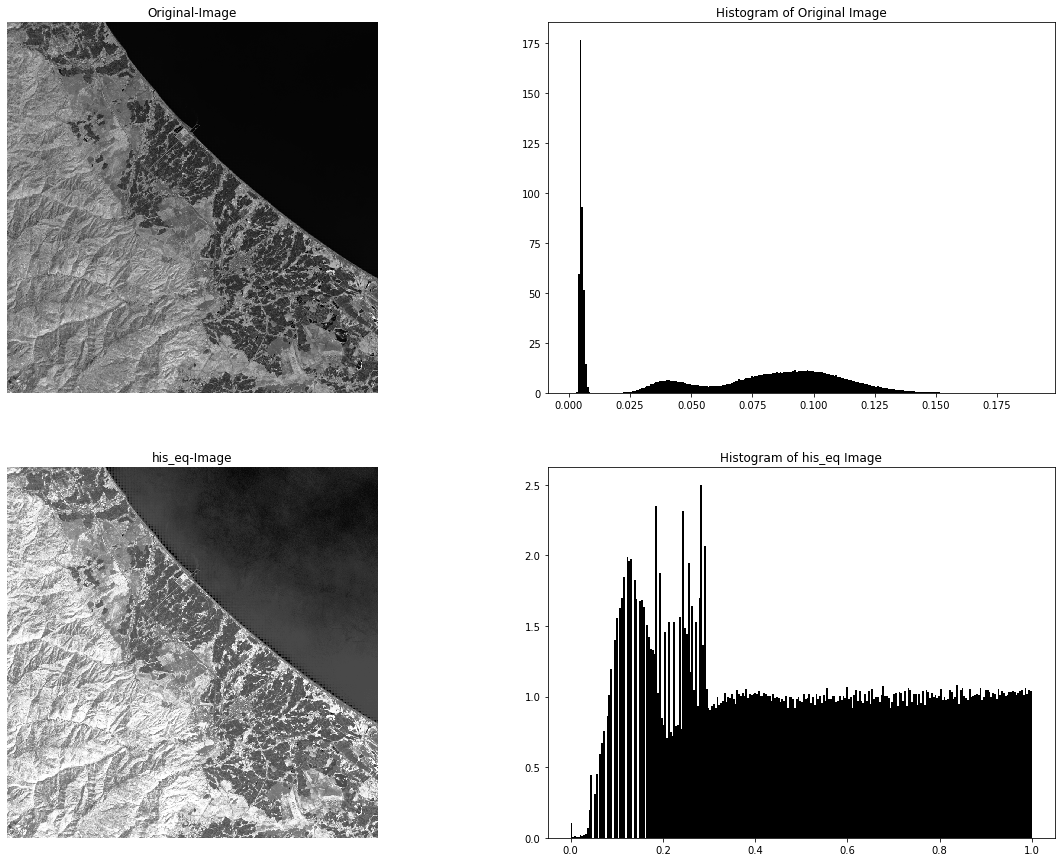

In [72]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('Original-Image')
ax[0,0].axis('off')
ax[0,1].hist(img.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[0,1].ticklabel_format(style='plain')
ax[0,1].set_title('Histogram of Original Image')
######################################################
ax[1,0].imshow(his_eq, cmap='gray')
ax[1,0].set_title('his_eq-Image')
ax[1,0].axis('off')
ax[1,1].hist(his_eq.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[1,1].ticklabel_format(style='plain')
ax[1,1].set_title('Histogram of his_eq Image')
plt.show()

In [39]:
img.mean() < gamma_corr.mean()

True